In [1]:
!pip install matplotlib numpy scipy pandas jupyter notebook

  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   -------------------------- ------------- 5.5/8.3 MB 27.5 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 23.3 MB/s  0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------------------ --------------------- 6.0/12.9 MB 30.2 MB/s eta 0:00:01
   -------------------------------------- - 12.6/12.9 MB 30.7 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 29.2 MB/s  0:00:00
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ------ --------------------------------- 6.8/39.4 MB 34.2 MB/s eta 0:00:01
   ------------- -------------------------- 13.6/39.4 MB 33.1 MB/s 

In [3]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.io

# Irradiance Trace Visualization

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Dec 29 12:26:39 2020', '__version__': '1.0', '__globals__': [], 'Gmonth': array([[0.00000000e+00, 0.00000000e+00],
       [9.00000000e+02, 6.76852745e+01],
       [1.80000000e+03, 7.77214440e+01],
       ...,
       [7.73460000e+06, 0.00000000e+00],
       [7.73550000e+06, 0.00000000e+00],
       [7.73640000e+06, 0.00000000e+00]], shape=(4770, 2))}
Shape: (4770, 2)
Timestamp:
[0.0000e+00 9.0000e+02 1.8000e+03 ... 7.7346e+06 7.7355e+06 7.7364e+06]
Irradiance:
[ 0.         67.68527452 77.72144401 ...  0.          0.
  0.        ]


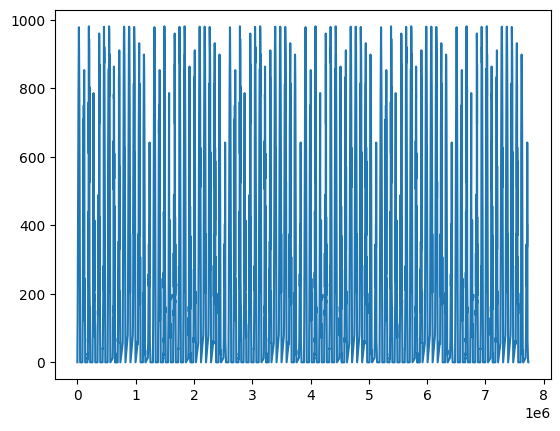

In [4]:
# Load the .mat file
mat_file = scipy.io.loadmat('gmonths.mat')

# Display the contents of the .mat file
print(mat_file)  # -> dict
print(f"Shape: {mat_file['Gmonth'].shape}")
timestamp = mat_file['Gmonth'][:, 0]  # [s]
irradiance = mat_file['Gmonth'][:, 1]  # [W/m^2]
print(f"Timestamp:\n{timestamp}")
print(f"Irradiance:\n{irradiance}")

# Plot
fig, ax = plt.subplots()
ax.plot(timestamp, irradiance)

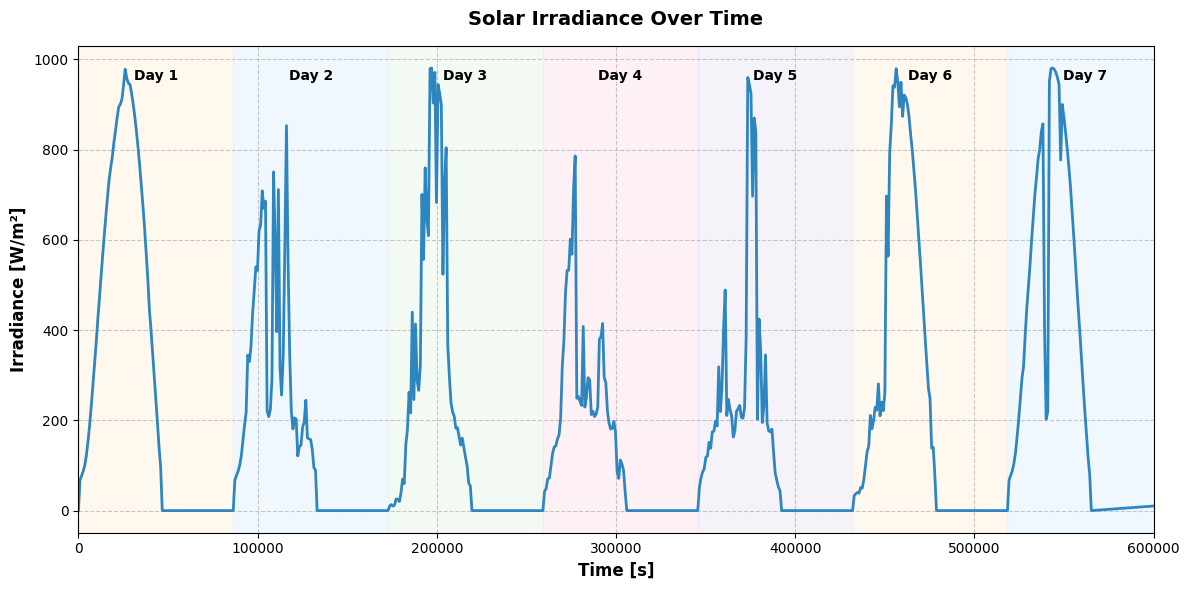

In [5]:
# Display the first six days
BEGIN, END = 0, int(6 * 86_400 / 900)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot main data
ax.plot(timestamp[BEGIN:END], irradiance[BEGIN:END], 
        label='Irradiance', 
        color='#2E86C1', 
        linewidth=2)

# Add colored backgrounds and labels for each day
colors = ['#FFF3E0', '#E3F2FD', '#E8F5E9', '#FCE4EC', '#EDE7F6']
seconds_per_day = 86_400

for day in range(((END * 900) // seconds_per_day) + 1):
    day_start = day * seconds_per_day
    day_end = (day + 1) * seconds_per_day
    
    # Add colored background
    ax.axvspan(day_start, day_end, 
               color=colors[day % len(colors)], 
               alpha=0.5,
               label=f'Day {day+1}')
    
    # Add day label
    ax.text((day_start + day_end)/2, ax.get_ylim()[1]*0.95,
            f'Day {day+1}',
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=10,
            fontweight='bold')

# Customize appearance
ax.set_xlabel('Time [s]', fontsize=12, fontweight='bold')
ax.set_ylabel('Irradiance [W/m²]', fontsize=12, fontweight='bold')
ax.set_title('Solar Irradiance Over Time', fontsize=14, pad=15, fontweight='bold')

# Add grid and legend
ax.grid(True, which='major', linestyle='--', alpha=0.7)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlim(0, 600_000)

plt.tight_layout()
plt.show()

# PV Panel Datasheet Digitalization

![](datasheet/PVcell/datasheet.bmp)

The [plotdigitizer](https://plotdigitizer.com/app) is easy to use and suggested. Any other software can be used to digitize the datasheet.

警告: 没找到文件 ./samples/750w.txt，使用模拟数据演示。


C:\Users\lili\AppData\Local\Temp\ipykernel_29016\2987135736.py:10: UserWarning: loadtxt: input contained no data: "./samples/750w.txt"
  data = np.loadtxt(filename, delimiter=',', skiprows=1)


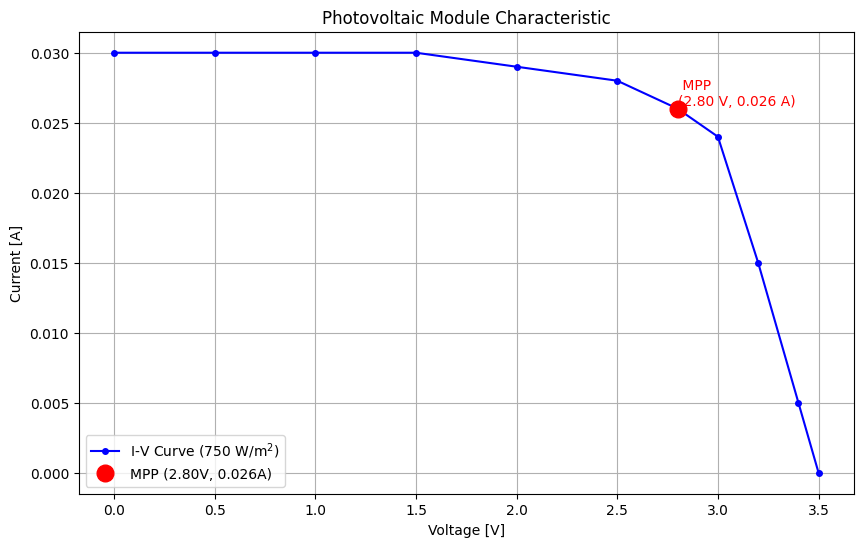

Irradiance: 750 W/m^2
MPP Voltage: 2.8000 V
MPP Current: 0.0260 A
Max Power: 0.0728


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 设置配置
filename = './samples/1000w.txt'  # 你的文件路径
g = 750                     # 对应的光照强度

# 2. 读取数据
try:
    data = np.loadtxt(filename, delimiter=',', skiprows=1)
    voltage_raw = data[:, 0]
    current_raw = data[:, 1]
except Exception as e:
    # 如果找不到文件，这里生成一些模拟数据方便演示代码效果
    print(f"警告: 没找到文件 {filename}，使用模拟数据演示。")
    voltage_raw = np.array([0.5, 3.0, 1.0, 3.2, 1.5, 3.4, 2.0, 0.0, 2.5, 2.8, 3.5])
    current_raw = np.array([0.03, 0.024, 0.03, 0.015, 0.03, 0.005, 0.029, 0.03, 0.028, 0.026, 0.0])

# 3. 排序 (解决曲线乱跑的问题)
sort_indices = np.argsort(voltage_raw)
x_sorted = voltage_raw[sort_indices]
y_sorted = current_raw[sort_indices]

# 4. 计算 MPP
power = x_sorted * y_sorted
max_idx = np.argmax(power) # 找到最大功率的索引

v_mpp = x_sorted[max_idx]
i_mpp = y_sorted[max_idx]
max_p = power[max_idx]

# ================= 绘图部分 =================
plt.figure(figsize=(10, 6))

# 第一步：画蓝色的曲线
# 'b-o' 意思是 blue(蓝色) line(-) with circle marker(o)
plt.plot(x_sorted, y_sorted, 'b-o', label=f'I-V Curve ({g} W/m$^2$)', markersize=4)

# 第二步：画红色的 MPP 点
# 'ro' 意思是 red(红色) circle(圆点)
# markersize=10 把点画大一点，显眼
plt.plot(v_mpp, i_mpp, 'ro', markersize=12, label=f'MPP ({v_mpp:.2f}V, {i_mpp:.3f}A)')
# 标注 MPP 点
plt.text(v_mpp, i_mpp, f' MPP\n({v_mpp:.2f} V, {i_mpp:.3f} A)', 
         fontsize=10, color='red', verticalalignment='bottom')

plt.xlabel('Voltage [V]')
plt.ylabel('Current [A]')
plt.title(f'Photovoltaic Module Characteristic')
plt.legend()
plt.grid(True)
plt.show()

# ================= 打印结果 =================
print(f"Irradiance: {g} W/m^2")
print(f"MPP Voltage: {v_mpp:.4f} V")
print(f"MPP Current: {i_mpp:.4f} A")
print(f"Max Power: {power.max():.4f}")

# DC-DC Converter Datasheet Digitalization

![](datasheet/PV_DCDCconv/efficiency.jpeg)

In [ ]:
# PV Panel Converter
# TODO

![](datasheet/Battery_DCDCconv/dcdc_fig.jpg)

In [ ]:
# Battery Converter
# TODO

# Battery model

![](datasheet/Battery/datasheet.jpg)

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
# Extract digitalized points
data = np.loadtxt('datasheet/Battery/trace_05C.txt', delimiter=',', skiprows=1)
voltage = data[:, 0]
soc = data[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(voltage, soc, 'o-', label='SOC-V Curve')
plt.ylabel('Voltage [V]')
plt.xlabel('SOC')
plt.legend()
plt.grid(True)
plt.show()

# Interpolate
newX = np.linspace(0, 1, 100)
interp_func = interp1d(soc, voltage, bounds_error=False)
newY = interp_func(newX)


In [ ]:
# Do the same for another curve
# TODO

### How to use `curve_fit`

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
# Define polynomial function (3rd degree)
def poly_func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

# Generate data
x_data = np.linspace(-5, 5, 100)
true_params = [0.1, -0.5, 1.0, 2.0]  # True coefficients
y_true = poly_func(x_data, *true_params)
noise = np.random.normal(0, 1, len(x_data))
y_data = y_true + noise

# Fit the data
popt, pcov = curve_fit(poly_func, x_data, y_data)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, alpha=0.5, label='Noisy Data')
plt.plot(x_data, poly_func(x_data, *popt), 'r-', 
         label=f'Fit: {popt[0]:.2f}x³ + {popt[1]:.2f}x² + {popt[2]:.2f}x + {popt[3]:.2f}')
plt.plot(x_data, y_true, 'g--', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define exponential decay function
def exp_decay(x, A, k, c):
    return A * np.exp(-k * x) + c

# Generate data
x_data = np.linspace(0, 10, 100)
true_params = [10.0, 0.5, 1.0]  # [amplitude, decay rate, offset]
y_true = exp_decay(x_data, *true_params)
noise = np.random.normal(0, 0.5, len(x_data))
y_data = y_true + noise

# Fit the data
popt, pcov = curve_fit(exp_decay, x_data, y_data)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, alpha=0.5, label='Noisy Data')
plt.plot(x_data, exp_decay(x_data, *popt), 'r-', 
         label=f'Fit: {popt[0]:.2f}*exp(-{popt[1]:.2f}x) + {popt[2]:.2f}')
plt.plot(x_data, y_true, 'g--', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### Overfitting Example

In [ ]:
# Define high degree polynomial for overfitting
def complex_func(x, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9):
    return (a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + 
            a5*x**5 + a6*x**6 + a7*x**7 + a8*x**8 + a9*x**9)

# Generate more points with higher noise
x_data = np.linspace(0, 10, 30)  # Increased to 30 points
true_params = [1.0, 0.5]
y_true = true_params[0] + true_params[1] * x_data
noise = np.random.normal(0, 0.5, len(x_data))  # Increased noise standard deviation to 0.5
y_data = y_true + noise

# Fit with overly complex function
initial_guess = np.ones(10)
popt, pcov = curve_fit(complex_func, x_data, y_data, p0=initial_guess)

# Generate smooth points for plotting
x_smooth = np.linspace(0, 10, 1000)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', s=50, alpha=0.6, label='Noisy Data')
plt.plot(x_smooth, complex_func(x_smooth, *popt), 'r-', 
         label='Overfitted (9th degree)')
plt.plot(x_smooth, true_params[0] + true_params[1]*x_smooth, 'g--',
         label='True Linear Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Overfitting with Noisy Data')
plt.grid(True)
plt.show()

In [ ]:
# Fit the data to obtain V_OC(SOC)
# TODO

In [ ]:
# Fit the data to obtain R(SOC)
# TODO